<center><img src="https://github.com/MAGALLANESJoseManuel/OpenDataBigData_at_quality4point0/blob/main/logo.png?raw=true
" width="1000"></center>



# The Dengue DATA



1. From the official site [itself](https://www.datosabiertos.gob.pe/dataset/vigilancia-epidemiol%C3%B3gica-de-dengue)

In [3]:
import time

link="https://www.datosabiertos.gob.pe/sites/default/files/datos_abiertos_vigilancia_dengue.csv"

import pandas as pd

# ALSO: time it takes
start_time = time.time()
dengue=pd.read_csv(link)
print(time.time() - start_time, "seconds")

2. Let's use a free cloud service (original file):


In [4]:
start_time = time.time()

GitFolder="https://github.com/MagallanesTalks/OpenBigData_atPUCP/raw/refs/heads/main/data/"
myLinkGit=GitFolder+"datos_abiertos_vigilancia_dengue.csv"

dengue=pd.read_csv(myLinkGit, on_bad_lines="warn")

print(time.time() - start_time, "seconds")


<ipython-input-4-de818eceb132>:6: ParserWarning: Skipping line 87871: expected 14 fields, saw 16
Skipping line 88799: expected 14 fields, saw 16
Skipping line 89573: expected 14 fields, saw 16

  dengue=pd.read_csv(myLinkGit, on_bad_lines="warn")
<ipython-input-4-de818eceb132>:6: ParserWarning: Skipping line 176478: expected 14 fields, saw 16
Skipping line 177184: expected 14 fields, saw 16
Skipping line 177191: expected 14 fields, saw 16
Skipping line 183099: expected 14 fields, saw 16

  dengue=pd.read_csv(myLinkGit, on_bad_lines="warn")
<ipython-input-4-de818eceb132>:6: ParserWarning: Skipping line 293518: expected 14 fields, saw 16

  dengue=pd.read_csv(myLinkGit, on_bad_lines="warn")
<ipython-input-4-de818eceb132>:6: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  dengue=pd.read_csv(myLinkGit, on_bad_lines="warn")


2.241084575653076 seconds


Using a different engine:

In [ ]:
start_time = time.time()

myLinkGit=GitFolder+"datos_abiertos_vigilancia_dengue.csv"
dengueArrow=pd.read_csv(myLinkGit, on_bad_lines="warn", engine='pyarrow')

print(time.time() - start_time, "seconds")

We can recover what is missing:

In [5]:
# badLines=["PIURA,TALARA,PARIѐAS,ENACE I-II-III,DENGUE SIN SEÑALES DE ALARMA,2009,7,A97.0,31,200701,2007010008,7,A,M;
# PIURA,TALARA,PARIѐAS,ENACE I-II-III,DENGUE SIN SEÑALES DE ALARMA,2009,13,A97.0,31,200701,2007010008,13,A,F;
# PIURA,TALARA,PARIѐAS,ENACE I-II-III,DENGUE SIN SEÑALES DE ALARMA,2009,9,A97.0,31,200701,2007010008,23,A,F;
# PIURA,TALARA,PARIѐAS,ENACE I-II-III,DENGUE SIN SEÑALES DE ALARMA,2013,15,A97.0,31,200701,2007010008,15,A,F;
# PIURA,TALARA,PARIѐAS,ENACE I-II-III,DENGUE SIN SEÑALES DE ALARMA,2013,15,A97.0,31,200701,2007010008,18,A,M;
# PIURA,TALARA,PARIѐAS,ENACE I-II-III,DENGUE SIN SEÑALES DE ALARMA,2015,24,A97.0,31,200701,2007010008,50,A,M;
# PIURA,TALARA,PARIѐAS,ENACE I-II-III,DENGUE SIN SEÑALES DE ALARMA,2013,7,A97.0,31,200701,2007010008,8,A,M;
# PIURA,TALARA,PARIѐAS,ENACE I-II-III,DENGUE SIN SEÑALES DE ALARMA,2017,19,A97.0,31,200701,2007010008,28,A,M"]

badLines=["PIURA,TALARA,PARIѐAS,ENACE I-II-III,DENGUE SIN SEÑALES DE ALARMA,2009,7,A97.0,31,200701,2007010008,7,A,M;PIURA,TALARA,PARIѐAS,ENACE I-II-III,DENGUE SIN SEÑALES DE ALARMA,2009,13,A97.0,31,200701,2007010008,13,A,F;PIURA,TALARA,PARIѐAS,ENACE I-II-III,DENGUE SIN SEÑALES DE ALARMA,2009,9,A97.0,31,200701,2007010008,23,A,F;PIURA,TALARA,PARIѐAS,ENACE I-II-III,DENGUE SIN SEÑALES DE ALARMA,2013,15,A97.0,31,200701,2007010008,15,A,F;PIURA,TALARA,PARIѐAS,ENACE I-II-III,DENGUE SIN SEÑALES DE ALARMA,2013,15,A97.0,31,200701,2007010008,18,A,M; PIURA,TALARA,PARIѐAS,ENACE I-II-III,DENGUE SIN SEÑALES DE ALARMA,2015,24,A97.0,31,200701,2007010008,50,A,M;PIURA,TALARA,PARIѐAS,ENACE I-II-III,DENGUE SIN SEÑALES DE ALARMA,2013,7,A97.0,31,200701,2007010008,8,A,M;PIURA,TALARA,PARIѐAS,ENACE I-II-III,DENGUE SIN SEÑALES DE ALARMA,2017,19,A97.0,31,200701,2007010008,28,A,M"]


missingLines=pd.DataFrame([cell.split(',') for cell in [ line.split(";") for line in badLines][0]],columns=dengue.columns)
missingLines

,departamento,provincia,distrito,localidad,enfermedad,ano,semana,diagnostic,diresa,ubigeo,localcod,edad,tipo_edad,sexo
0,PIURA,TALARA,PARIѐAS,ENACE I-II-III,DENGUE SIN SEÑALES DE ALARMA,2009,7,A97.0,31,200701,2007010008,7,A,M
1,PIURA,TALARA,PARIѐAS,ENACE I-II-III,DENGUE SIN SEÑALES DE ALARMA,2009,13,A97.0,31,200701,2007010008,13,A,F
2,PIURA,TALARA,PARIѐAS,ENACE I-II-III,DENGUE SIN SEÑALES DE ALARMA,2009,9,A97.0,31,200701,2007010008,23,A,F
3,PIURA,TALARA,PARIѐAS,ENACE I-II-III,DENGUE SIN SEÑALES DE ALARMA,2013,15,A97.0,31,200701,2007010008,15,A,F
4,PIURA,TALARA,PARIѐAS,ENACE I-II-III,DENGUE SIN SEÑALES DE ALARMA,2013,15,A97.0,31,200701,2007010008,18,A,M
5,PIURA,TALARA,PARIѐAS,ENACE I-II-III,DENGUE SIN SEÑALES DE ALARMA,2015,24,A97.0,31,200701,2007010008,50,A,M
6,PIURA,TALARA,PARIѐAS,ENACE I-II-III,DENGUE SIN SEÑALES DE ALARMA,2013,7,A97.0,31,200701,2007010008,8,A,M
7,PIURA,TALARA,PARIѐAS,ENACE I-II-III,DENGUE SIN SEÑALES DE ALARMA,2017,19,A97.0,31,200701,2007010008,28,A,M


Then,

In [26]:
dengue_ok=pd.concat([dengue,missingLines])
dengue_ok.info()

<class 'pandas.core.frame.DataFrame'>
Index: 501692 entries, 0 to 7
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   departamento  501692 non-null  object
 1   provincia     501692 non-null  object
 2   distrito      501692 non-null  object
 3   localidad     400753 non-null  object
 4   enfermedad    501692 non-null  object
 5   ano           501692 non-null  object
 6   semana        501692 non-null  object
 7   diagnostic    501692 non-null  object
 8   diresa        501669 non-null  object
 9   ubigeo        501692 non-null  object
 10  localcod      407822 non-null  object
 11  edad          501692 non-null  object
 12  tipo_edad     501692 non-null  object
 13  sexo          501692 non-null  object
dtypes: object(14)
memory usage: 57.4+ MB


Some housecleaning:

In [27]:
# verify the text is full of numbers
dengue_ok.loc[:,['ano','semana','edad']].apply(lambda col:col.str.isnumeric().all())

,0
ano,True
semana,True
edad,True


In [28]:
# make the change
dengue_ok[['ano','semana','edad']]=dengue_ok.loc[:,['ano','semana','edad']].apply(pd.to_numeric)
dengue_ok.info()

<class 'pandas.core.frame.DataFrame'>
Index: 501692 entries, 0 to 7
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   departamento  501692 non-null  object
 1   provincia     501692 non-null  object
 2   distrito      501692 non-null  object
 3   localidad     400753 non-null  object
 4   enfermedad    501692 non-null  object
 5   ano           501692 non-null  int64 
 6   semana        501692 non-null  int64 
 7   diagnostic    501692 non-null  object
 8   diresa        501669 non-null  object
 9   ubigeo        501692 non-null  object
 10  localcod      407822 non-null  object
 11  edad          501692 non-null  int64 
 12  tipo_edad     501692 non-null  object
 13  sexo          501692 non-null  object
dtypes: int64(3), object(11)
memory usage: 57.4+ MB


Do we have complete location information:

In [29]:
dengue_ok[dengue_ok.diresa.isna()]

,departamento,provincia,distrito,localidad,enfermedad,ano,semana,diagnostic,diresa,ubigeo,localcod,edad,tipo_edad,sexo
437858,UCAYALI,PADRE ABAD,BOQUERON,NaN,DENGUE SIN SEÑALES DE ALARMA,2021,50,A97.0,NaN,250307,NaN,33,A,F
437863,UCAYALI,PADRE ABAD,BOQUERON,NaN,DENGUE SIN SEÑALES DE ALARMA,2021,50,A97.0,NaN,250307,NaN,9,A,M
437864,UCAYALI,PADRE ABAD,BOQUERON,NaN,DENGUE CON SEÑALES DE ALARMA,2021,50,A97.1,NaN,250307,NaN,19,A,F
437865,UCAYALI,PADRE ABAD,BOQUERON,NaN,DENGUE SIN SEÑALES DE ALARMA,2021,50,A97.0,NaN,250307,NaN,14,A,F
437918,UCAYALI,PADRE ABAD,BOQUERON,NaN,DENGUE SIN SEÑALES DE ALARMA,2021,51,A97.0,NaN,250307,NaN,5,A,M
441173,UCAYALI,PADRE ABAD,BOQUERON,NaN,DENGUE SIN SEÑALES DE ALARMA,2022,3,A97.0,NaN,250307,NaN,40,A,M
441732,UCAYALI,PADRE ABAD,HUIPOCA,NaN,DENGUE SIN SEÑALES DE ALARMA,2022,4,A97.0,NaN,250306,NaN,4,A,F
443602,UCAYALI,PADRE ABAD,BOQUERON,NaN,DENGUE SIN SEÑALES DE ALARMA,2022,6,A97.0,NaN,250307,NaN,25,A,M
443603,UCAYALI,PADRE ABAD,BOQUERON,NaN,DENGUE SIN SEÑALES DE ALARMA,2022,6,A97.0,NaN,250307,NaN,20,A,F
443604,UCAYALI,PADRE ABAD,BOQUERON,NaN,DENGUE CON SEÑALES DE ALARMA,2022,5,A97.1,NaN,250307,NaN,10,A,M


In [30]:
# then
dengue_ok=dengue_ok[~dengue_ok.diresa.isna()]

Let's keep it as a string:

In [47]:
dengue_ok['diresa']=dengue_ok.diresa.astype(int).astype(str)

In [50]:
# check
dengue_ok[dengue_ok.diresa.str.contains(r'[^0-9]',regex=True)]

,departamento,provincia,distrito,localidad,enfermedad,ano,semana,diagnostic,diresa,ubigeo,localcod,edad,tipo_edad,sexo


In [51]:
# provinces?
dengue_ok[dengue_ok.provincia.str.contains(r'[^A-Z\sÑ]',regex=True)]

,departamento,provincia,distrito,localidad,enfermedad,ano,semana,diagnostic,diresa,ubigeo,localcod,edad,tipo_edad,sexo


Then,

In [52]:
dengue_ok=dengue_ok[~dengue_ok.provincia.str.contains(r'[^A-Z\sÑ]',regex=True)]

What levels of this?

In [11]:
dengue_ok.enfermedad.value_counts()

,count
enfermedad,
DENGUE SIN SEÑALES DE ALARMA,444005
DENGUE CON SEÑALES DE ALARMA,54984
DENGUE GRAVE,2259


What do we have here?

In [12]:
dengue_ok.tipo_edad.value_counts()

,count
tipo_edad,
A,497315
M,3741
D,192


Are YEARS ok?

<Axes: xlabel='ano'>

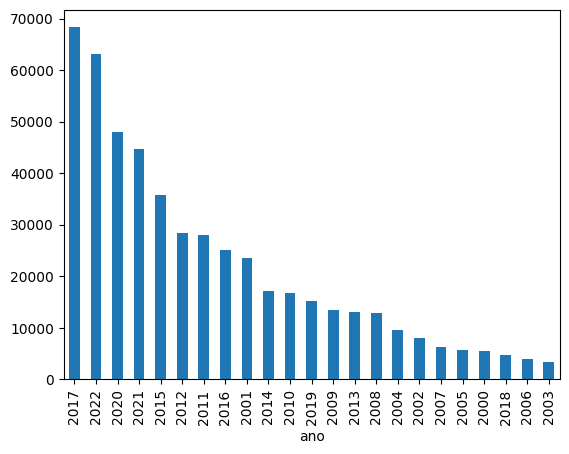

In [13]:
dengue_ok.ano.value_counts().plot(kind='bar')

What about AGES ?

In [14]:
dengue_ok.edad.describe().apply(lambda x: format(x, 'f'))

,edad
count,501248.000000
mean,269.184112
std,117797.268597
min,0.000000
25%,15.000000
50%,26.000000
75%,41.000000
max,71963641.000000


In [15]:
# verifying:
dengue_ok[dengue_ok.edad>110]

,departamento,provincia,distrito,localidad,enfermedad,ano,semana,diagnostic,diresa,ubigeo,localcod,edad,tipo_edad,sexo
264046,PIURA,PIURA,CASTILLA,URB. MIRAFLORES,DENGUE SIN SEÑALES DE ALARMA,2017,13,A97.0,32.0,200104,2001040028.0,814,A,F
269201,PIURA,PIURA,LA ARENA,BARRIO 13 DE ABRIL,DENGUE SIN SEÑALES DE ALARMA,2017,16,A97.0,32.0,200109,2001090034.0,2846395,A,M
272866,PIURA,PIURA,CATACAOS,LA LEGUA,DENGUE SIN SEÑALES DE ALARMA,2017,17,A97.0,32.0,200105,2001050027.0,2692587,A,M
278714,PIURA,PIURA,PIURA,PIURA,DENGUE SIN SEÑALES DE ALARMA,2017,17,A97.0,32.0,200101,2001010001.0,330,A,M
278926,PIURA,PIURA,CASTILLA,CASTILLA,DENGUE CON SEÑALES DE ALARMA,2017,17,A97.1,32.0,200104,2001040001.0,6161,A,M
284499,PIURA,PIURA,PIURA,\N,DENGUE CON SEÑALES DE ALARMA,2017,18,A97.1,32.0,200101,2001010047.0,3767,A,F
288591,PIURA,PIURA,CURA MORI,CUCUNGARA,DENGUE CON SEÑALES DE ALARMA,2017,20,A97.1,32.0,200107,2001070001.0,71963641,A,M
288653,PIURA,PIURA,CURA MORI,CUCUNGARA,DENGUE SIN SEÑALES DE ALARMA,2017,20,A97.0,32.0,200107,2001070001.0,41964604,A,F
289607,PIURA,PIURA,CURA MORI,CUCUNGARA,DENGUE SIN SEÑALES DE ALARMA,2017,20,A97.0,32.0,200107,2001070001.0,419454,A,M
297896,PIURA,PIURA,CURA MORI,CUCUNGARA,DENGUE SIN SEÑALES DE ALARMA,2017,19,A97.0,32.0,200107,2001070001.0,249906,A,M


Notice the **ubigeo** is for distrito, then:

In [53]:
dengue_ok['ubigeo']=[str(u)[:-2] for u in dengue_ok.ubigeo]

Let's remove these columns:

In [54]:
toDelete=['diagnostic',	'localcod']
dengue_ok.drop(columns=toDelete,inplace=True)
dengue_ok=dengue_ok[dengue_ok.edad<110]

##check
dengue_ok.info()

<class 'pandas.core.frame.DataFrame'>
Index: 501213 entries, 0 to 7
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   departamento  501213 non-null  object
 1   provincia     501213 non-null  object
 2   distrito      501213 non-null  object
 3   localidad     400704 non-null  object
 4   enfermedad    501213 non-null  object
 5   ano           501213 non-null  int64 
 6   semana        501213 non-null  int64 
 7   diresa        501213 non-null  object
 8   ubigeo        501213 non-null  object
 9   edad          501213 non-null  int64 
 10  tipo_edad     501213 non-null  object
 11  sexo          501213 non-null  object
dtypes: int64(3), object(9)
memory usage: 49.7+ MB


Let's make the last change and save:

In [55]:

import os

folder = "data"

# Check whether the specified path exists or not
if not os.path.exists(folder):
   # Create a new directory because it does not exist
   os.makedirs(folder)
   dengue_ok.to_csv(os.path.join('data','dengue_ok.csv'),index=False)
   dengue_ok.to_parquet(os.path.join('data','dengue_ok.parquet'),index=False)

else:
    dengue_ok.to_csv(os.path.join('data','dengue_ok.csv'),index=False)
    dengue_ok.to_parquet(os.path.join('data','dengue_ok.parquet'),index=False)